# Beautiful Charts

**Inhalt:** Etwas Chart-Formatierung

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Basic Parameter in der Plot-Funktion kennenlernen
- Charts formatieren mit weiteren Befehlen
- Intro für Ready-Made Styles und Custom Styles
- Charts exportieren


**Weitere Ressourcen:**
- Alle Ressourcen: siehe https://github.com/MAZ-CAS-DDJ/kurs_19_20/tree/master/08%20Pandas%20Teil%201/material
- Simons Cheat Sheet: https://github.com/MAZ-CAS-DDJ/kurs_19_20/blob/master/08%20Pandas%20Teil%201/material/plotting.md

## Charts in Pandas

Eine Reihe von Basic Chart-Funktionalitäten haben wir bereits kennengelernt:
- Line Plots
- Bar Charts
- Histogramme
- etc.

Wenn wir darüber hinausgehen wollen, kann es sehr schnell kompliziert werden. Es gibt zig verschiedene Arten, wie man auf die Funktionen zugreifen kann und Charts formatieren kann.

- Die Funktion, die wir bereits kennen, heisst `plot()`. Wir können sie ausgehend von einem Dataframe oder einer Serie verwenden. Hier die offizielle Referenz dazu: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

- Im Hintergrund der `plot()`-Funktion steht die Matplotlib-Bibliothek:  https://matplotlib.org/index.html. Bei manchen Formatierungs-Optionen müssen wir Befehle direkt von dort verwenden.

## Setup

Wir importieren dieses Mal diverse Libraries:

- Pandas

In [1]:
import pandas as pd

- und Matplotlib, um auf einige Spezialfunktionen zugreifen zu können

In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.patches as mpatches

In [5]:
import matplotlib.image as mpimg

In [6]:
import matplotlib.ticker as ticker

## das Beispiel

Eine Liste von Ländern mit ihrer Grösse, BIP pro Kopf und Lebenserwartung

In [7]:
path = "dataprojects/countries/countries.csv"

In [8]:
df = pd.read_csv(path)

In [9]:
df.head(3)

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827


## Elemente eines Charts

Ein Chart besteht aus überraschend vielen Elementen.

Die meisten Programmiersprachen verwenden ähnliche Namen dafür.

Hier die Bezeichnungen bei Pandas / Matplotlib:

(Quelle: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

In [10]:
from IPython.display import display, Image

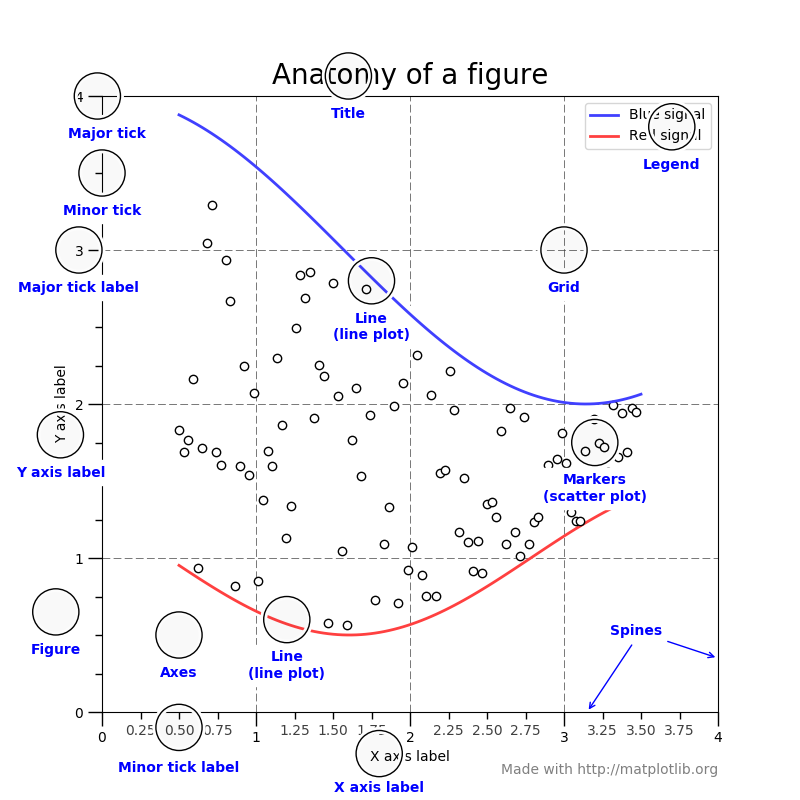

In [11]:
img = Image(filename='BeautifulCharts/anatomy.png')
display(img)

## Ein simpler Scatterplot

Das hier kennen wir bereits:

<AxesSubplot:xlabel='gdp_per_capita', ylabel='life_expectancy'>

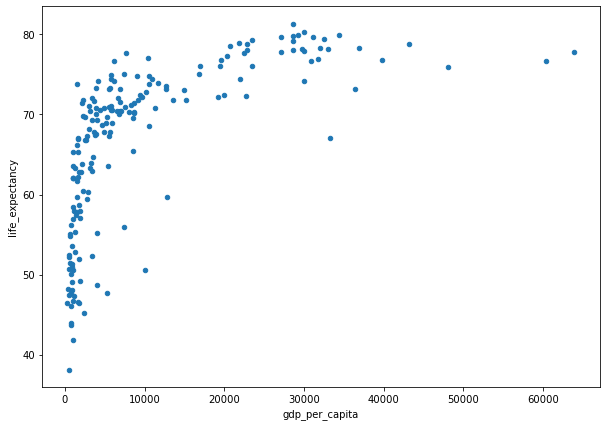

In [12]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        figsize=(10,7))

## Den Chart verschönern

(oder verschlimmern, je nach dem, wie man es nimmt...)

### Variante 1: nur plot()-Parameter

In der Plot-Funktion selbst hat es bereits einige Parameter, mit denen wir etwas spielen können:

<AxesSubplot:title={'center':'Ab einem BIP pro Kopf von 20000 steigt die Lebenserwartug nicht mehr'}, xlabel='gdp_per_capita', ylabel='life_expectancy'>

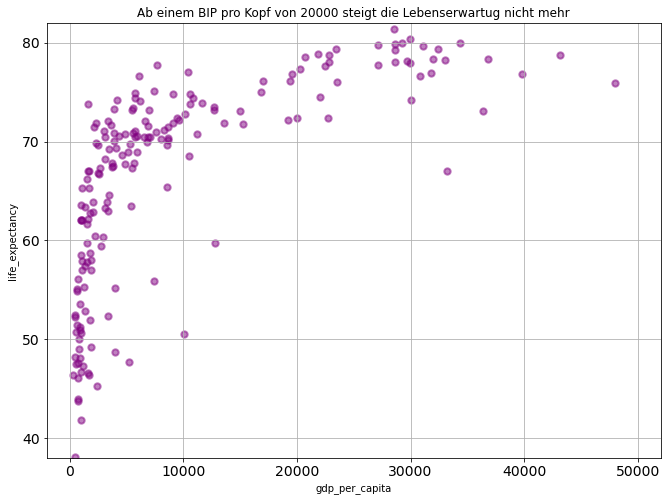

In [13]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy', 
        alpha=0.5, #Transparenz der Füllfarbe
        s=40, #Grösse der PUnkte
        color='purple', #Farbe der Punkte
        linewidth=2, #Dicke der Rahmenlinie
        xlim=(-2000,52000), #Min und Max für die X-Achse
        ylim=(38, 82), #Min und Max für die Y-Achse
        xticks=[0,10000,20000,30000,40000,50000], #Die X-Ticks einzeln spezifizieren
        yticks=[0,40,50,60,70,80], #Die Y-Ticks einzeln spezifizieren
        figsize=(11,8), #Grösse der Abbildung
        grid=True, #Gitternetzlinien ja/nein
        fontsize=14, #Schriftrösse der Tick Labels
        title='Ab einem BIP pro Kopf von 20000 steigt die Lebenserwartug nicht mehr')

### Variante 2: plot()-Parameter und matplotlib-Funktionen

Dazu gibt es noch zig weitere Einstellungen, die man im Nachhinein definieren oder verändern kann.

Wir müssen dazu den Output der `plot()`-Funktion in einer eigenen Variable speichern. Typischerweise: `ax`

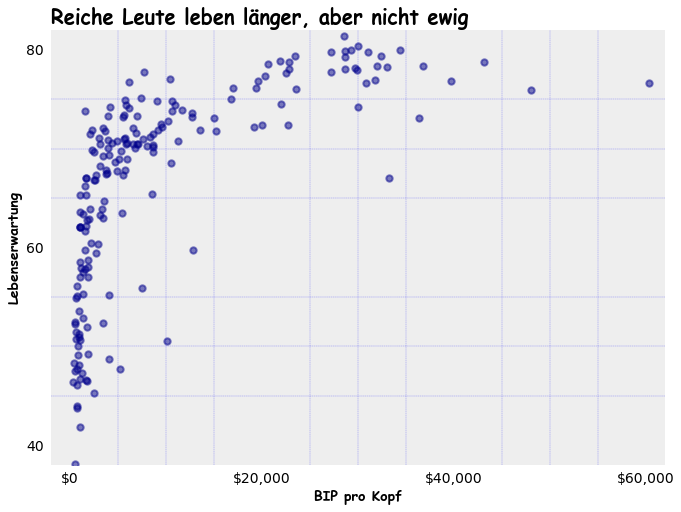

In [14]:
#Was man mit der Pandas-Funktion alles machen kann
ax = df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy', 
        alpha=0.5,
        s=40,
        color='darkblue',
        linewidth=2,
        xlim=(-2000,62000),
        ylim=(38, 82),
        xticks=[0,20000,40000,60000],
        yticks=[40,60,80],
        figsize=(11,8),
        grid=True,
        fontsize=14)

#Was man separat einstellen kann:

# - Titel
title_font = {'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Comic Sans MS'}
ax.set_title('Reiche Leute leben länger, aber nicht ewig', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'bold', 'fontname': 'Comic Sans MS'}
ax.set_ylabel("Lebenserwartung", fontdict=label_font)
ax.set_xlabel("BIP pro Kopf", fontdict=label_font)
ax.yaxis.set_label_position('left')

# - Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,}'))

# Gitternetz formatieren
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='black', )
ax.minorticks_on()
ax.grid(which='minor', linestyle='-.', linewidth='0.2', color='blue', )

# - Rahmenlinien ausschalten
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# - Hintergrundfarbe
ax.set_facecolor('#EEEEEE')

### Variante 3: nur matplotlib-Funktion

Manchmal erstellen wir einen Plot gar nicht via plot(), sondern über matplotlib. ZB bei Small Multiples.

In dem Fall müssen wir praktisch alle Parameter via Matplotlib setzen, leider.

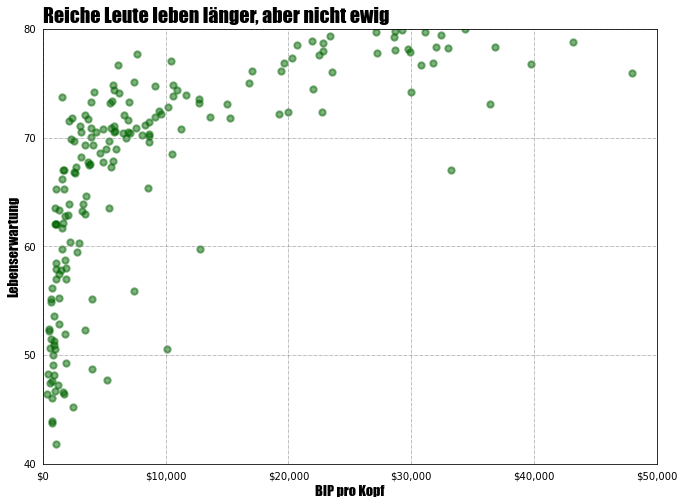

In [15]:
# Zuerst ein Figure- und ein Ax-Objekt erstellen
fig, ax = plt.subplots()

# Dann aus dem Ax-Objekt heraus einen Plot erstellen.
# Die scatter()-Funktion ist ähnlich, aber nicht identisch wie plot(kind='scatter')
ax.scatter(x=df['gdp_per_capita'], y=df['life_expectancy'],
        alpha=0.5,
        s=40,
        color='darkgreen',
        linewidth=2)

# Eine ganze Reihe von Chart-Formatierungsparametern konnten wir hier nicht ansprechen
# Wir müssen sie extra nochmals neu setzen

# - Die Grösse der Abbildung
fig.set_size_inches(11, 8) #NEU

# - Den Titel
ax.set_title('Reiche Leute leben länger, aber nicht ewig', fontsize=20, fontname='Impact', loc='left')

# - Die Achsen
ax.set_xlim([0, 50000]) #NEU
ax.set_ylim([40, 80]) #NEU
ax.set_ylabel("Lebenserwartung", fontsize=14, fontname='Impact', fontweight='bold')
ax.set_xlabel("BIP pro Kopf", fontsize=14, fontname='Impact', fontweight='bold')

# - Die Ticks
ax.xaxis.set_ticks([0, 10000, 20000, 30000, 40000, 50000]) #NEU
ax.yaxis.set_ticks([40, 50, 60, 70, 80]) #NEU
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,}'))

# - Das Gitter
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey', )

# - Etc. etc: Alles, was wir in Variante 2 verwendet haben, können wir auch hier verwenden.

Klingt kompliziert...? **Ja, ist es!** Darum: Mit den Formatierungen am besten erst ganz am Schluss herumspielen, wenn es wirklich darum geht, einen Chart irgendwo zu präsentieren. Für schnelles Abchecken und Austesten von Charts lohnt sich das einfach nicht.

Eine andere Variante, wie wir etwas rascher mit Styles spielen können, finden wir noch weiter unten.

Zuerst aber noch was anderes.

## Legende und Farben

Wie vorgehen, wenn wir die einzelnen Punkte entsprechend einer Kategorie einfärben wollen, zB nach dem Kontinent? Hier eine Lösung.

### Für die Farben

In [16]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'N. America', 'S. America', 'Oceania'],
      dtype=object)

In [17]:
colors = {
    'Asia': 'green',
    'Europe': 'blue',
    'Africa': 'brown',
    'N. America': 'yellow',
    'S. America': 'red',
    'Oceania': 'purple'
}

In [18]:
colorlist = df['continent'].apply(lambda continent: colors[continent])

### Für die Legende

In [19]:
patches = []
for continent, color in colors.items():
    this_patch = mpatches.Patch(color=color, label=continent, alpha=0.5)
    patches.append(this_patch)

### Für die Punktegrösse

In [20]:
area = df['population'] / 400000

### Plotten

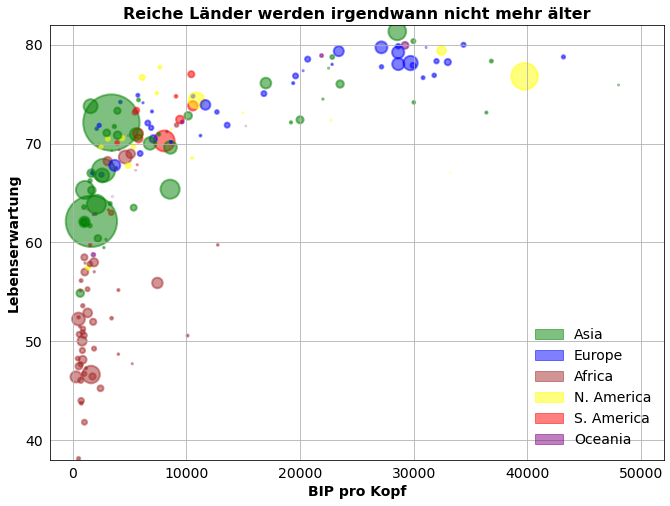

In [21]:
#Was man mit der Pandas-Funktion alles machen kann
ax = df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy', 
        alpha=0.5,
        s=area,
        color=colorlist,
        linewidth=2,
        xlim=(-2000,52000),
        ylim=(38, 82),
        xticks=[0,10000,20000,30000,40000,50000],
        yticks=[0,40,50,60,70,80],
        figsize=(11,8),
        grid=True,
        fontsize=14)

#Was man separat einstellen kann: - Titel
ax.set_title('Reiche Länder werden irgendwann nicht mehr älter', fontsize=16, fontweight='bold')

# - Achsenbeschriftungen
ax.set_ylabel("Lebenserwartung", fontsize=14, fontweight='bold')
ax.set_xlabel("BIP pro Kopf", fontsize=14, fontweight='bold')

# - Ticks ausschalten
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# - Legende (this is really an ugly way to do this)
ax.legend(handles=patches, frameon=False, fontsize=14)

Hans Rosling would be so proud!! https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo

### Wichtig

Nochmals: Eine genaue und vollständige Liste der Parameter zu kriegen, ist so gut wie unmöglich (tell me if you find one!).

Daher, und nicht nur daher, lohnt es sich im allgemeinen nicht, allzu viel Zeit für die Formatierung von Charts aufzuwenden. Besser: Daten oder pdf evportieren und anderswo weiterbearbeiten.

Eine andere Option ist, mit einem prädefinierten Stil zu arbeiten

## Exportieren

Wir können einzelne Plots als Dateien exportieren. Dazu 1x diese Einstellung ausführen:

In [22]:
matplotlib.rcParams['pdf.fonttype'] = 42 #important for the fonts

Und dann exportieren.
- als pdf

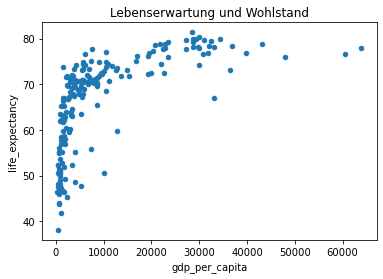

In [23]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')
plt.savefig("BeautifulCharts/Lebenserwartung-Wohlstand.pdf")

- als svg-Vektorgrafik

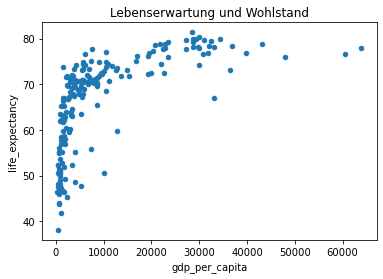

In [24]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')
plt.savefig("BeautifulCharts/Lebenserwartung-Wohlstand.svg")

## Prädefinierte Stile

Diese Stile sind ziemlich praktisch. Man kann sich eine Liste davon anzeigen lassen:

In [25]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Um einen bestimmten Stil zu verwenden:

In [26]:
plt.style.use('seaborn')

Umgesetzt sieht das dann so aus:

<AxesSubplot:title={'center':'Lebenserwartung und Wohlstand'}, xlabel='gdp_per_capita', ylabel='life_expectancy'>

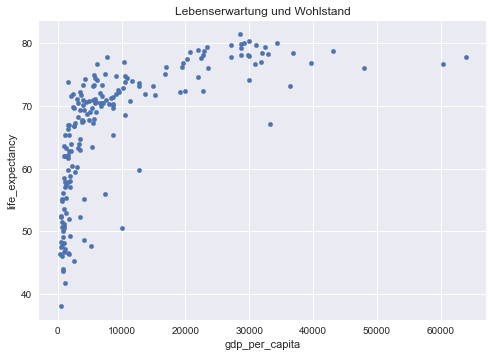

In [27]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')

Der neue Style bleibt so lange gespeichert, bis wir ihn wieder zurücksetzen.

In [28]:
plt.style.use('default')

## Custom Style Sheets

Wer es mit den Matplotlib wirklich wissen will, kann sich auch sein eigenes Stylesheet erstellen.

Schritt1: Erstelle eine Datei mit diesem Namen (oder irgendeinem anderen Namen):

`my_style.mplstyle`

In die Datei, schreibe die eigenen Default-Werte für bestimmte Stil-Elemente rein:

`axes.titlesize : 20
axes.labelsize : 16
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 14
ytick.labelsize : 14
axes.grid : True
grid.color : red`

etc.

Die Dokumentation über alle möglichen Parameter gibt es hier: https://matplotlib.org/tutorials/introductory/customizing.html#sphx-glr-tutorials-introductory-customizing-py

Style laden:

In [29]:
plt.style.use('BeautifulCharts/my_style.mplstyle')

Test:

<AxesSubplot:title={'center':'Lebenserwartung und Wohlstand'}, xlabel='gdp_per_capita', ylabel='life_expectancy'>

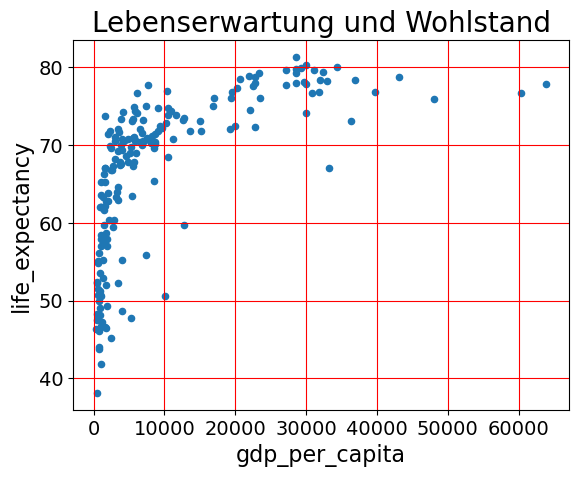

In [30]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')